<a href="https://colab.research.google.com/github/JeanCCA/Proyecto-parcial/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install BeautifulSoup4
%pip install requests
%pip install pandas
%pip install WordCloud
%pip install Colorama


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from PIL import Image
import string
import requests
import pandas as pd
import os
from colorama import init, Fore
from google.colab import output


Bienvenido.
Este programa le permite generar un WordCloud
de las etiquetas de un Usuario de
Stack Overflow en Español (es.stackoverflow.com/users/)
Word Cloud generado: 


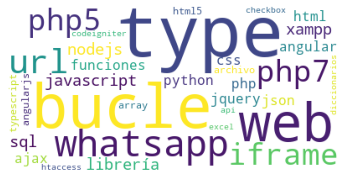

Escriba 'salir, Salir, SALIR' para salir de la app. 
o cualquier carácter para continuar: Salir


NameError: ignored

In [ ]:
def ciclo(n, p):
    y = 0
    while y < n:
        y = y + 1
        tex.write("\t"+p)

def scraping(id,tagdict):
    link = 'https://es.stackoverflow.com/users/'+id+'/?tab=tags'
    pagina = requests.get(link)
    soup = BeautifulSoup(pagina.content, 'html.parser')
    while pagina.status_code!=200:
        print("El usuario buscado no existe.")
        print("")
        id2=input("Ingrese el id del usuario: ")
        link = 'https://es.stackoverflow.com/users/' + id2 + '/?tab=tags'
        pagina = requests.get(link)
        soup = BeautifulSoup(pagina.content, 'html.parser')

    Tags = soup.find_all('a', class_='post-tag')
    Points = soup.find_all('div', class_='answer-votes')
    etiquetas = list()

    for i in Tags:
        etiquetas.append(i.text)

    puntos = list()

    for i in Points:
        puntos.append(i.text.replace('k','000'))

    for i in range(len(etiquetas)-1):
      if int(puntos[i])>0:
        tagdict[etiquetas[i]] = int(puntos[i])

def wordcloud(tagdict):
    x = 0
    for x in tagdict:
      if tagdict[x]>0:
        n = tagdict[x]
        p = x
        ciclo(n, p)
    tex.close()
    with open("note.txt", encoding='utf-8')as file: 
      text = file.read()
      normal_word = r"(?:\w[\w']+)"
      ascii_art = r"(?:\w[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
      c= r"(?:\w[{punctuation}]+)".format(punctuation=string.punctuation)
      emoji = r"(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
      regexp = r"{normal_word}|{ascii_art}|{emoji}|{c}".format( normal_word = normal_word,ascii_art=ascii_art,emoji=emoji,c=c)
      cloud = WordCloud(background_color="white", collocations=False,regexp=regexp).generate(text)
      plt.imshow(cloud)
      plt.axis('off') 
      plt.show()

def inicio():
    print("Bienvenido.\nEste programa le permite generar un WordCloud\nde las etiquetas de un Usuario de\nStack Overflow en Español (es.stackoverflow.com/users/)")
    id = input("Por favor ingresar el ID de usuario: ")
    tagdict = {}
    scraping(id,tagdict)
    if tagdict: 
        print("Word Cloud generado: ")
        wordcloud(tagdict)
    S = input("Escriba 'salir, Salir, SALIR' para salir de la app. \no cualquier carácter para continuar: ")
    if s=="salir" or s=="Salir" or s=="SALIR":
        output.clear()

    else:
     print("No se pudo generar el Word Cloud...")

while True:
    output.clear()
    tex = open("note.txt", "w")
    inicio()
    x=str(input("Escriba 'salir, Salir, SALIR' para salir de la app. \no cualquier carácter para continuar: "))
    if x=="salir" or x=="Salir" or x=="SALIR":
        output.clear()
        break